In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob

data = {}
precompiles = ["ecadd", "ecmul","ecpairing", "p256verify", "secp256k1verify"]
optimizations = [2,3,"s","z"]

In [2]:
for precompile in precompiles:
    data[precompile] = pd.DataFrame(columns=['test', ''])
    for optimization in optimizations:
        file = f"./tests/gas_reports_{optimization}/{precompile}_report.csv"
        df = pd.read_csv(file, skipinitialspace=True)
        df.rename(columns = {'gas':f"{optimization}"}, inplace=True)
        data[precompile] = pd.merge(data[precompile], df, on='test', how='outer')
    data[precompile].drop([''], axis=1, inplace=True)

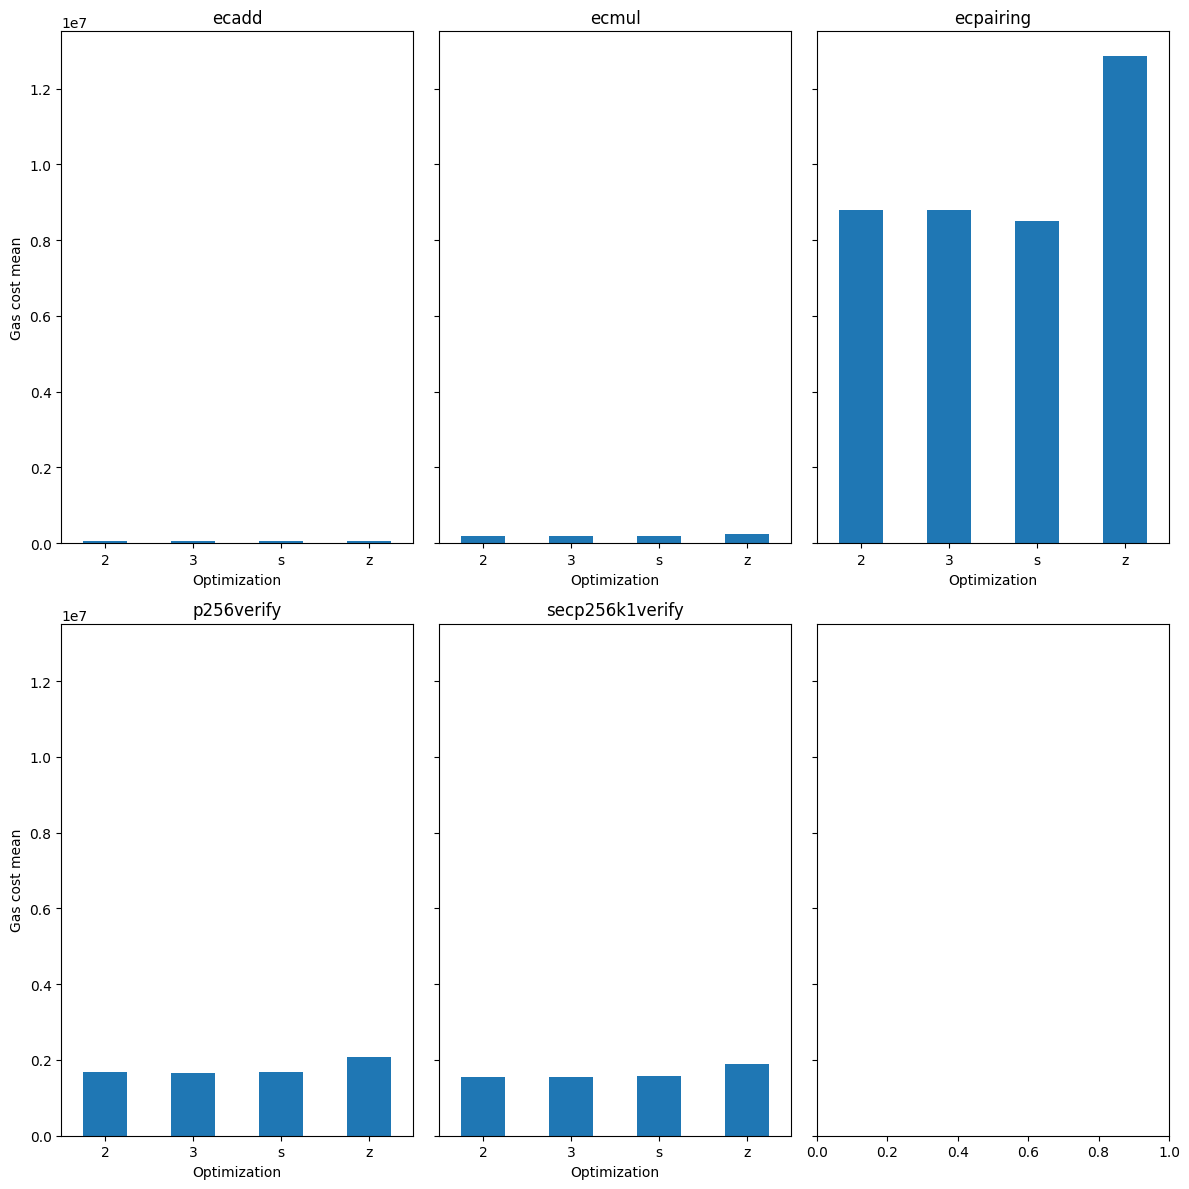

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharey=True)

for i, precompile in enumerate(precompiles):
    means = data[precompile][['2', '3', 's', 'z']].mean()

    row = i // 3
    col = i % 3

    means.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'{precompile}')
    axes[row, col].set_xlabel('Optimization')
    axes[row, col].set_ylabel('Gas cost mean')
    axes[row, col].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [5]:
data["ecmul"]

,test,2,3,s,z
0,ecmul_0_0_0_21000_96,54546,54546,54066,53840
1,ecmul_0_0_0_21000_128,54546,54546,54066,53840
2,ecmul_0_0_0_28000_128,54546,54546,54066,53840
3,ecmul_0_0_0_28000_0,54528,54528,54048,53822
4,ecmul_0_0_0_21000_0,54528,54528,54048,53822
...,...,...,...,...,...
113,ecmul_7827_6598_9_28000_96,96822,96822,96246,98462
114,ecmul_7827_6598_9935_28000_96,754734,754734,734478,1060454
115,ecmul_7827_6598_9_21000_128,96822,96822,96246,98462
116,ecmul_7827_6598_9_21000_96,96822,96822,96246,98462


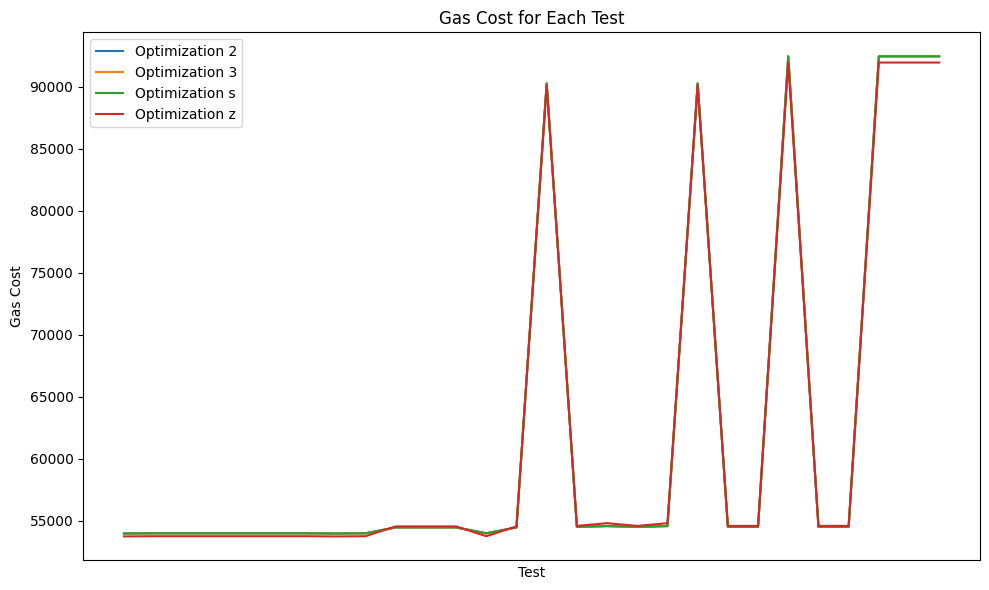

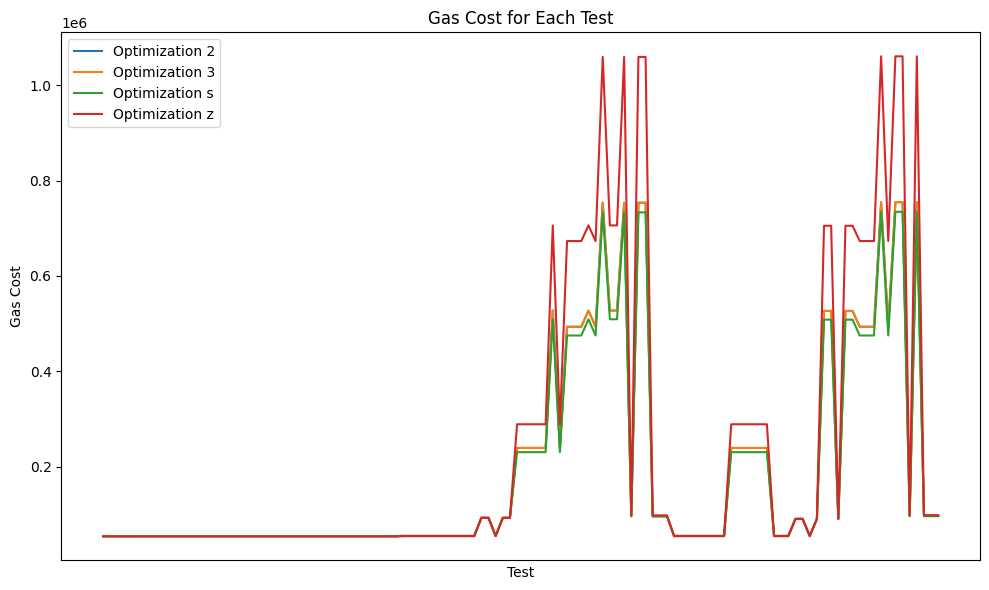

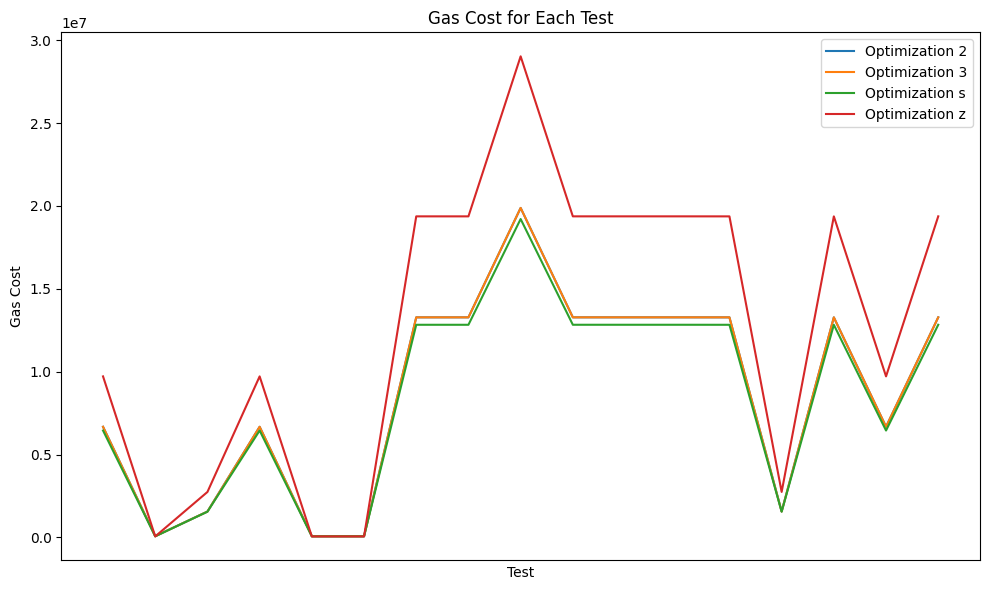

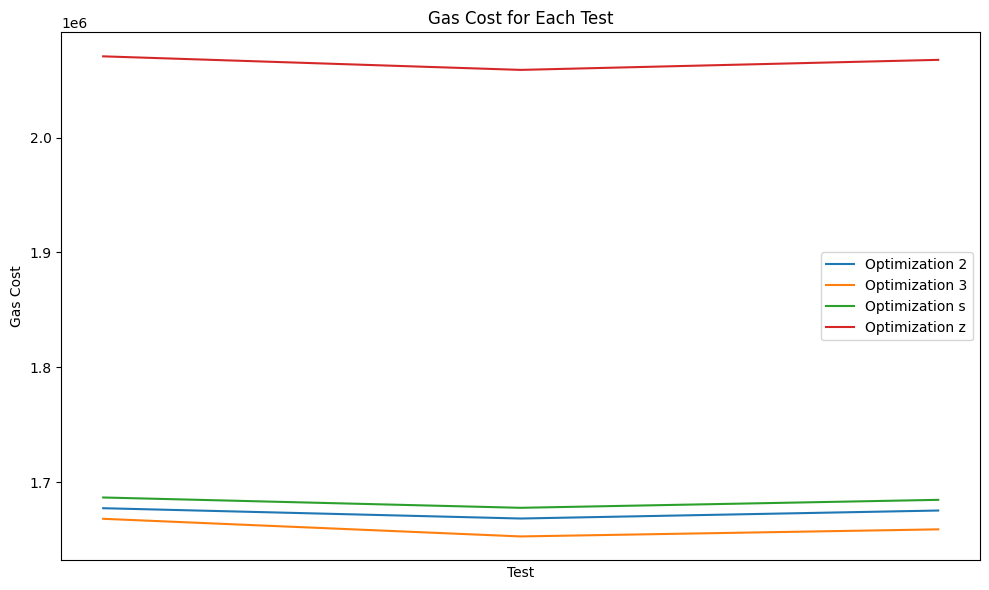

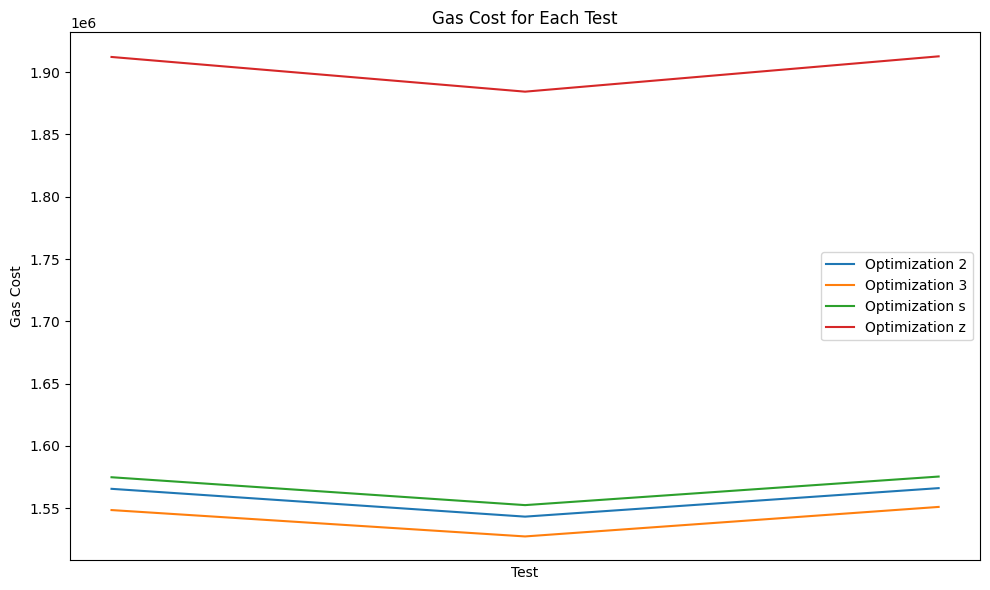

In [22]:
for precompile in precompiles:
    plt.figure(figsize=(10, 6))
    plt.plot(data[precompile]['test'], data[precompile]['2'], label='Optimization 2')
    plt.plot(data[precompile]['test'], data[precompile]['3'], label='Optimization 3')
    plt.plot(data[precompile]['test'], data[precompile]['s'], label='Optimization s')
    plt.plot(data[precompile]['test'], data[precompile]['z'], label='Optimization z')
    
    plt.xlabel('Test')
    plt.ylabel('Gas Cost')
    plt.xticks([])
    plt.legend()
    
    plt.title('Gas Cost for Each Test')
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

In [79]:
data["ecpairing"]

,test,2,3,s,z
0,ecpairing_one_point_insufficient_gas,6675152,6675152,6448214,9715269
1,ecpairing_one_point_with_g2_zero,72880,72880,67312,60040
2,ecpairing_one_point_with_g1_zero,1559074,1559074,1553506,2742166
3,ecpairing_one_point_fail,6675152,6675152,6448214,9715269
4,ecpairing_empty_data,71566,71566,65998,58474
5,ecpairing_empty_data_insufficient_gas,71566,71566,65998,58474
6,ecpairing_three_point_match_1,13277910,13277910,12829602,19371482
7,ecpairing_two_point_fail_2,13277832,13277832,12829524,19371080
8,ecpairing_three_point_fail_1,19880182,19880182,19210504,29026711
9,ecpairing_two_point_fail_1,13278594,13278594,12830286,19371908


In [26]:
data["ecadd"]["3"].mean()

62298.857142857145

In [27]:
data["ecadd"]["s"].mean()

62298.857142857145

In [60]:
data["ecmul"]

,test,2,3,s,z
0,ecmul_0_0_0_21000_96,54546,54546,54066,53840
1,ecmul_0_0_0_21000_128,54546,54546,54066,53840
2,ecmul_0_0_0_28000_128,54546,54546,54066,53840
3,ecmul_0_0_0_28000_0,54528,54528,54048,53822
4,ecmul_0_0_0_21000_0,54528,54528,54048,53822
...,...,...,...,...,...
113,ecmul_7827_6598_9_28000_96,96822,96822,96246,98462
114,ecmul_7827_6598_9935_28000_96,754734,754734,734478,1060454
115,ecmul_7827_6598_9_21000_128,96822,96822,96246,98462
116,ecmul_7827_6598_9_21000_96,96822,96822,96246,98462


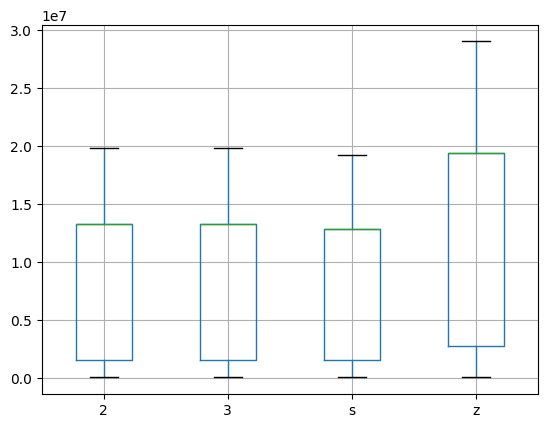

In [78]:
boxplot = data["ecpairing"].boxplot(column=['2', '3', 's', 'z'])  

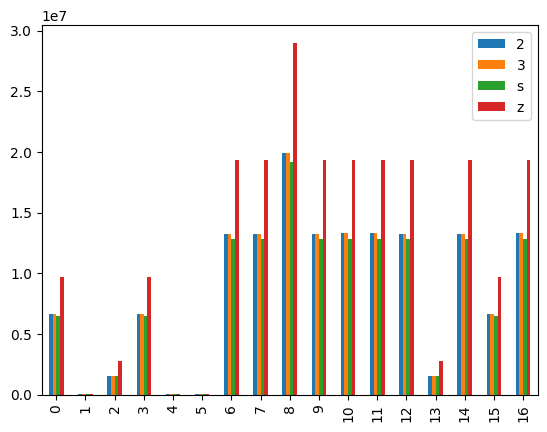

In [38]:
ax = data["ecpairing"].plot.bar(column=['2', '3', 's', 'z'],rot=0)

(0.0, 3000000.0)

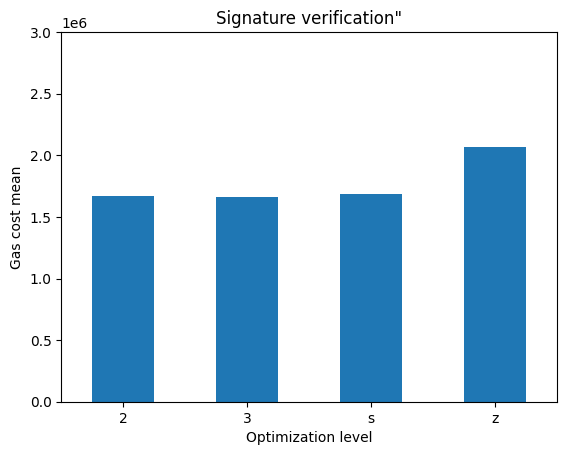

In [92]:
mean = data["p256verify"][['2', '3', 's', 'z']].mean()

ax = mean.plot(kind='bar', rot=0, title='Signature verification"')
ax.set_xlabel('Optimization level')
ax.set_ylabel('Gas cost mean')
ax.set_ylim(0, 3000000)

In [84]:
 data["p256verify"][['2', '3', 's', 'z']].max()

2    1677467
3    1668249
s    1686795
z    2070647
dtype: int64

In [85]:
 data["p256verify"][['2', '3', 's', 'z']].min()

2    1668497
3    1652901
s    1677813
z    2058851
dtype: int64

In [89]:
 data["p256verify"][['2', '3', 's', 'z']].mean()

2    1673805.0
3    1660075.0
s    1683117.0
z    2065697.0
dtype: float64

In [90]:
 data["secp256k1verify"][['2', '3', 's', 'z']].mean()

2    1558247.0
3    1542233.0
s    1567525.0
z    1903101.0
dtype: float64